# **ABSTRACT - BOOKING DATA**

El conjunto de datos de reservas hoteleras constituye una valiosa fuente de información que abarca una amplia gama de características relacionadas con las reservas en dos hoteles puntuales. Este conjunto de datos aborda aspectos fundamentales vinculados a la gestión de hoteles, proporcionando insights valiosos.
En primer lugar, el dataset incluye información esencial sobre las dos propiedades hoteleras mencionadas, en la columna ('hotel') y detalles relacionados con la cancelación de reservas ('is_canceled'). El número de días transcurridos entre la fecha de entrada de la reserva en el sistema y la fecha de llegada ('lead_time') se destaca como una característica crucial, brindando perspectivas sobre el comportamiento de planificación de los huéspedes.
Aspectos temporales también son abordados, con variables como el año y mes de llegada ('arrival_date_year', 'arrival_date_month'), la semana de llegada ('arrival_date_week_number') y el día del mes de llegada ('arrival_date_day_of_month'). Estos elementos temporalmente detallados proporcionan un contexto valioso para entender patrones estacionales y comportamientos de reserva a lo largo del tiempo.
La duración de la estadía ('stays_in_weekend_nights', 'stays_in_week_nights') y la composición del grupo de huéspedes ('adults', 'children', 'babies') son aspectos cruciales para entender las preferencias y necesidades de los visitantes. Detalles sobre comidas ('meal'), país de origen ('country'), segmento de mercado ('market_segment') y canal de distribución ('distribution_channel') ofrecen una comprensión más profunda de la demografía y origen de los huéspedes, así como el entendimiento acerca de qué estrategias de marketing son efectivas.
El historial del huésped ('is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled') y detalles sobre el tipo de habitación reservada y asignada ('reserved_room_type', 'assigned_room_type') proporcionan información sobre la lealtad del cliente y sus preferencias.
Variables como cambios en la reserva ('booking_changes'), tipo de depósito ('deposit_type'), agente y empresa asociados ('agent', 'company') agregan capas adicionales de detalle, mientras que información sobre el tiempo en lista de espera ('days_in_waiting_list'), tipo de cliente ('customer_type') y tarifa diaria ('adr') son fundamentales para comprender la gestión y la rentabilidad.
Asuntos logísticos y solicitudes especiales se abordan a través de características como estacionamiento requerido ('required_car_parking_spaces') y solicitudes especiales ('total_of_special_requests'). El estado actual de la reserva ('reservation_status') y su fecha asociada ('reservation_status_date') permiten un seguimiento en tiempo real del estado de las reservas.
En resumen, este dataset diverso y completo proporciona una base sólida para investigaciones detalladas y análisis predictivos en el sector hotelero, ofreciendo una visión integral de las transacciones y características asociadas con las reservas hoteleras.


## **OBJETIVO**

El objetivo de este proyecto es analizar la cancelación de reservas hoteleras utilizando datos históricos, para poder gestionar mejor la estrategia comercial de los hoteles. A medida que avance en el curso, la idea es desarrollar un modelo predictivo para predecir cancelaciones de reservas.

Variables de interés:

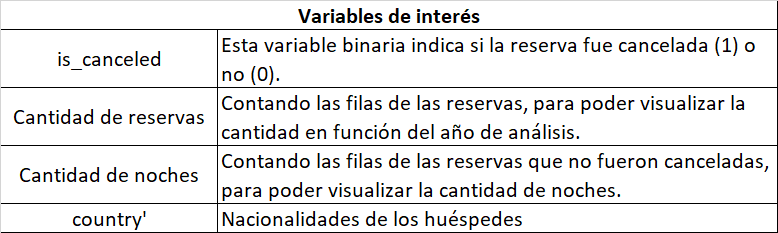

## **CONTEXTO COMERCIAL**

Este proyecto se enmarca en la industria hotelera, que enfrenta desafíos únicos vinculados con la gestión de reservas y la satisfacción del cliente. La capacidad de predecir con precisión las cancelaciones de reservas puede ayudar a los hoteles a optimizar sus ingresos, asignar recursos de manera más eficiente y mejorar la experiencia del cliente.

## **PROBLEMA COMERCIAL**

El problema comercial a abordar es la incapacidad de los hoteles para anticipar y gestionar eficazmente las cancelaciones de reservas. Las cancelaciones de última hora pueden tener un impacto negativo en la rentabilidad y la eficiencia operativa de un hotel. Por lo tanto, es crucial desarrollar estrategias efectivas para predecir y mitigar este problema. En lo sucesivo, se presentan las preguntas y respuestas del problema.

In [3]:
# Importamos las librerías que se usarán

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#Montamos el dataframe - Booking data.xlsx
file_path = '/content/gdrive/MyDrive/Coderhouse/Data Science/Primera pre entrega/Booking data.xlsx'
df = pd.read_excel(file_path)

In [5]:
# Muestro las primeras filas de la base de datos

print(df[['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']].head())

   index         hotel  is_canceled  lead_time  arrival_date_year  \
0      0  Resort Hotel            0        342               2015   
1      1  Resort Hotel            0        737               2015   
2      2  Resort Hotel            0          7               2015   
3      3  Resort Hotel            0         13               2015   
4      4  Resort Hotel            0         14               2015   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  ...  deposit_type   agent  \
0                        0                 

**Primera pregunta**: ¿Cuál es el año en el que se tuvo la mayor cantidad de reservas?

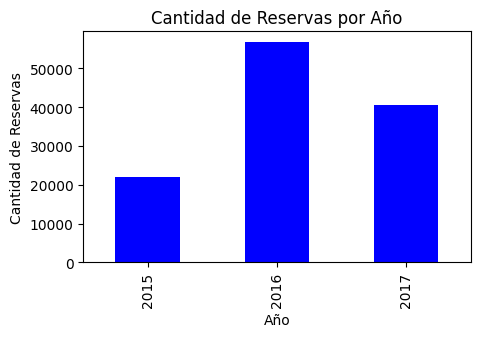

In [6]:
# Crearemos un gráfico de barras con la cantidad de reservas por año
reservas_por_anio = df.groupby('arrival_date_year')['index'].count()

# Configuramos el gráfico
plt.figure(figsize=(5, 3))
reservas_por_anio.plot(kind='bar', color='blue')
plt.title('Cantidad de Reservas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reservas')


# Mostramos el gráfico
plt.show()


**Respuesta**: Se observa que el mayor caudal de reservas se dió en 2016

**Segunda pregunta**: ¿Cuál es el tipo de habitación más demandada?

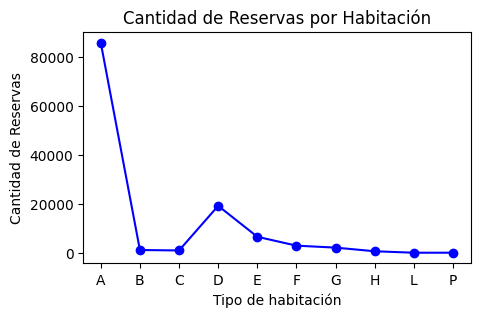

In [7]:
# Crearemos un gráfico de líneas con la cantidad de reservas por tipo de habitación reservada
reservas_por_habitacion = df.groupby('reserved_room_type')['index'].count()

# Configuramos el gráfico
plt.figure(figsize=(5, 3))
plt.plot(reservas_por_habitacion, marker='o', linestyle='-', color='blue')
plt.title('Cantidad de Reservas por Habitación')
plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad de Reservas')


# Mostramos el gráfico
plt.show()



**Respuesta**: Se observa que las habitaciones de tipo A son las más solicitadas

**Tercera pregunta**: ¿Cuál es la media de la cantidad de noches que se quedan los huéspedes? ¿Existe alguna tendencia central marcada?

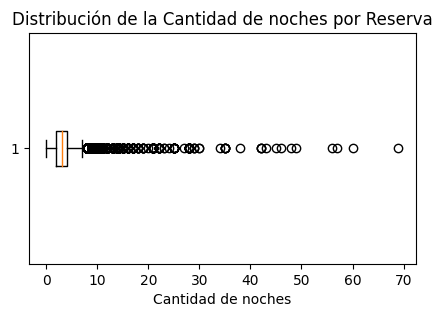

In [8]:
# Crearemos un boxplot con la cantidad noches que se alojan por reserva

df['nights_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

#Filtramos las reservas para mostrar sólo las que no se cancelaron

no_canceled = df.loc[df['is_canceled'] == 0]

plt.figure(figsize=(5, 3))
plt.boxplot(no_canceled['nights_of_stay'], vert=False)
plt.title('Distribución de la Cantidad de noches por Reserva')
plt.xlabel('Cantidad de noches')

# Mostramos el gráfico
plt.show()



**Respuesta**: Se observa que la media de reservas se da en tres noches aproximadamente. La distribución normal fluctúa entre 0 y 8 noches, y existen outliers

**Cuarta pregunta**: ¿En qué meses se registra la mayor cancelación de reservas, y en cuáles la menor?

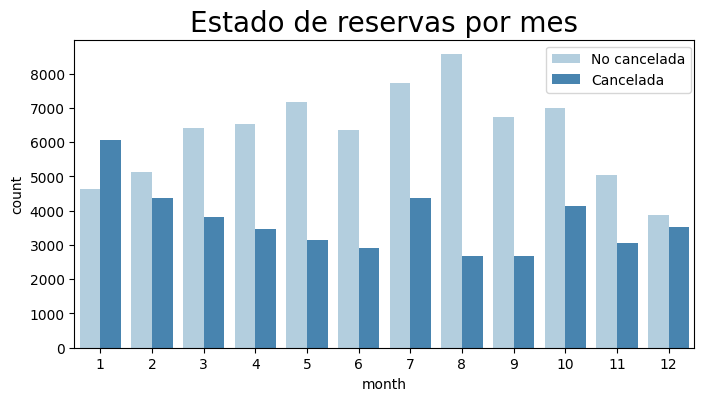

In [9]:
#Mostraremos el estado de las reservas, segmentadas por mes

plt.figure(figsize=(8,4))
df['month']=df['reservation_status_date'].dt.month
plt.title('Estado de reservas por mes', size=20)
sns.countplot(x='month',hue='is_canceled',data =df ,palette='Blues')
plt.legend( ['No cancelada', 'Cancelada'], bbox_to_anchor=(.75, 1), loc='upper left')

plt.show()



**Respuesta**: Se observa que en agosto se encuentra la mayor cantidad de reservas no canceladas, en tanto que en enero se suelen registrar la mayor cantidad de cancelaciones

**Quinta pregunta**: ¿Cuál es el estado de las reservas por cada hotel? ¿Cuál registra mayores cancelaciones?

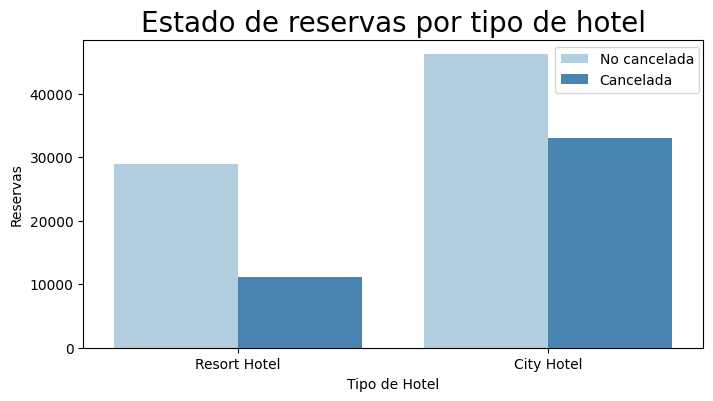

In [10]:
# Mostraremos el estado de las reservas, según el tipo de hotel

plt.figure(figsize=(8, 4))
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
ax1.legend( ['No cancelada', 'Cancelada'], bbox_to_anchor=(0.75, 1), loc='upper left')
plt.title('Estado de reservas por tipo de hotel', size=20)
plt.xlabel('Tipo de Hotel')
plt.ylabel('Reservas')

plt.show()



**Respuesta**: Se observa que la mayor cantidad de cancelaciones se registran en el City Hotel

**Sexta pregunta**: ¿Cuál es el top 5 de nacionalidades de los huéspedes?

<ipython-input-11-1d36b3c15eeb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country', data=df_top_nacionalidades, order=top_nacionalidades, palette='viridis')


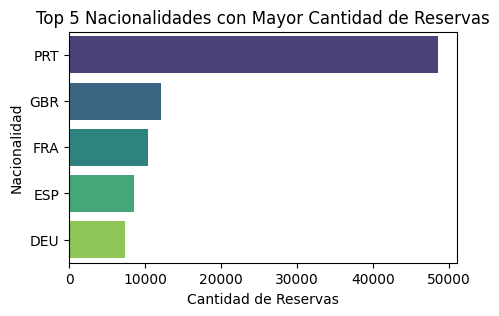

In [11]:
# Realizaremos un gráfico con las reservas por nacionalidad, en top 5

top_nacionalidades = df['country'].value_counts().head(5).index

# Filtramos el DataFrame para incluir solo las top 5 nacionalidades

df_top_nacionalidades = df[df['country'].isin(top_nacionalidades)]

plt.figure(figsize=(5, 3))
sns.countplot(y='country', data=df_top_nacionalidades, order=top_nacionalidades, palette='viridis')
plt.title('Top 5 Nacionalidades con Mayor Cantidad de Reservas')
plt.xlabel('Cantidad de Reservas')
plt.ylabel('Nacionalidad')

plt.show()



**Respuesta**: Los portugueses son los principales clientes. No estaría de más que los recepcionistan hablen portugues.

In [ ]:
print(df.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Dividimos el dataframe en características (X) y el objetivo (y)
X = df.drop(['is_canceled'], axis=1)  # X son las características, excluyendo la columna de objetivo 'is_canceled'
y = df['is_canceled']  # y es la columna objetivo 'is_canceled'

# Codificamos las columnas categóricas que necesitan ser codificadas
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                       'deposit_type', 'customer_type', 'reservation_status']

# Lista de columnas numéricas
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Definimos transformadores para preprocesamiento
numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinamos transformadores para preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Definimos el modelo de regresión logística
model = LogisticRegression()

# Definimos el selector de características RFE
rfe = RFE(model, n_features_to_select=10)  # Selecciona las 10 mejores características

# Definimos el pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', rfe)
])

# Entrenamos el pipeline
pipeline.fit(X, y)

# Obtenemos los nombres de las características seleccionadas
selected_features_indices = pipeline.named_steps['feature_selection'].support_
selected_features = pipeline.named_steps['preprocessor'].get_feature_names_out()[selected_features_indices]

print("Características seleccionadas:")
print(selected_features)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Características seleccionadas:
['num__required_car_parking_spaces' 'cat__hotel_City Hotel'
 'cat__country_PRT' 'cat__market_segment_Online TA'
 'cat__deposit_type_No Deposit' 'cat__deposit_type_Non Refund'
 'cat__customer_type_Transient' 'cat__reservation_status_Canceled'
 'cat__reservation_status_Check-Out' 'cat__reservation_status_No-Show']


Primero, preprocesamos los datos para manejar valores faltantes y codificar las características categóricas utilizando un pipeline que incluye SimpleImputer para imputar valores faltantes y OneHotEncoder para codificar características categóricas.
Luego, utilizamos la selección de características RFE con un modelo de regresión logística para seleccionar las 10 mejores características que contribuyen más a la predicción del objetivo.
Finalmente, identificamos las características seleccionadas y las mostramos en la salida. Estas características son las que se consideran más importantes para predecir si una reserva será cancelada o no.

# **Métricas**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo completo (utilizando el pipeline definido anteriormente)
pipeline.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular métricas de evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Mostrar las métricas calculadas
print("Métricas de validación del modelo:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Métricas de validación del modelo:
Accuracy: 1.00
Precisión: 1.00
Recall: 1.00
F1-score: 1.00
ROC AUC: 1.00


# **Conclusiones**

Estas métricas indican que el modelo de clasificación utilizado tiene overfitting, lo cual no es confiable. Evaluaremos utilizar otro modelo.

# **Evaluación de modelos**

Considerando que el método de regresión logística nos dá esas métricas, el modelo de clasificación utilizado tiene overfitting, lo cual no es confiable. Evaluaremos utilizar otro modelo.

# **Ada BOOST**

Utilizaremos modelo ADA Boost

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

Preparamos las columnas: para abordar la parte de training del modelo, nos ocupamos de las columnas categóricas, reemplazándolas con columnas dummies. Las columnas que manipulamos son: hotel, market_segment, distribution_channel, assigned_room_type, deposit_type, is_repeated_guest

In [15]:
# Prepare the inputs: To tackle the model traning part, we need to deal with categorical features, by replacing them with dummy columns. The features at hand are: hotel, market_segment, distribution_channel, room_assignmnt, deposit_type, is_repeated_guest

bookings = df[['is_canceled', 'lead_time', 'country', 'hotel', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_repeated_guest']]
booking_data_dummies=pd.get_dummies(data=bookings, columns=['hotel', 'country', 'market_segment', 'distribution_channel', 'assigned_room_type', 'deposit_type', 'customer_type', 'is_repeated_guest'])
print(booking_data_dummies.shape)



(119390, 215)


In [16]:
X = booking_data_dummies.drop(['is_canceled'], axis=1).values
y = booking_data_dummies.is_canceled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [17]:
dt = DecisionTreeClassifier(max_depth=15, random_state=7)
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=500)
adb_clf.fit(X_train, y_train)
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [24]:
#Calculamos las métricas

accuracy = accuracy_score(y_test, y_pred_proba.round())
precision = precision_score(y_test, y_pred_proba.round())
recall = recall_score(y_test, y_pred_proba.round())
f1 = f1_score(y_test, y_pred_proba.round())
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.8109277717285088
Precision: 0.7657760090960773
Recall: 0.7080423518810542
F1 Score: 0.7357783847054233
ROC AUC Score: 0.875606856732831


# **Conclusión**

Este modelo tiene muy buenas métricas, y no caemos ni underfitting ni en overfitting.